In [21]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import fluids as fl
from pint import _DEFAULT_REGISTRY as u

In [22]:
#converter function
def convertFunc():
    massFlow = 0.125*(u.kilogram/u.second)
    density = 69.205*(u.kilogram/u.meter**3)
    viscosity = 17.720*(u.micropascal*u.second)
    roughness = 0.00001*(u.meter)
    minDiam = 0.1*(u.inch)
    maxDiam = 1*(u.inch)
    diamStep = 0.01*(u.inch)
    straightLength = 2*(u.meter)
    bendAngle = 45*(u.degrees)
    
    # add innumbends anglebends fittings valves

    #variables to standard units
    massFlowS = massFlow.to("kilogram/second")
    densityS = density.to("kilogram/meter**3")
    viscosityS = viscosity.to("pascal*second")
    roughnessS = roughness.to("meter")
    minDiamS = minDiam.to("meter")
    maxDiamS = maxDiam.to("meter")
    diamStepS = diamStep.to("meter")
    straightlengthS = straightLength.to("meter")
    bendAngleS = bendAngle.to("degrees")
    return massFlowS, densityS, viscosityS, roughnessS, minDiamS, maxDiamS, diamStepS, straightlengthS
    
#def printFunc():
    #massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()

    #print(massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength)

    #add dictionary to easily assign numbers to variables

#printFunc()

In [23]:
def variablesFunc():
    #Input Variables, Units are Assigned
    massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()
    
    #Calculated Variables
    diamRange = (np.arange(minDiam.magnitude, maxDiam.magnitude, diamStep.magnitude))*(u.meter)
    areaRange = np.square(diamRange / (2*u.dimensionless)) * np.pi*(u.dimensionless)
    velocityRange = np.divide((massFlow), (areaRange * density))

    #Creating Empty Arrays For Variable Ranges
    reynoldsRange = np.empty(len(diamRange))
    frictionFactorRange = np.empty(len(diamRange))
    kFactorRange = np.empty(len(diamRange))
    pressureDropRange = np.empty(len(diamRange))
    

    #Iterating Through Diameters, Calculating Variable Ranges
    for i in np.arange(0, len(diamRange), 1):
        reynoldsRange[i] = fl.units.Reynolds(V=velocityRange[i], mu = viscosity, rho = density, D = diamRange[i])
        frictionFactorRange[i] = fl.units.friction_factor(Re = reynoldsRange[i], eD = np.divide(roughness,diamRange[i]), Darcy = True)
        kFactorRange[i] = fl.units.K_from_f(fd = frictionFactorRange[i], L = straightLength, D = diamRange[i])
        pressureDrop = fl.units.dP_from_K(K = kFactorRange[i], rho = density, V = velocityRange[i]) #Variable to temporarily store pressure drop

        pressureDropRange[i] = pressureDrop.magnitude #Array collects all pressure drop values
        
    pressureDropRange = pressureDropRange * pressureDrop.units #Unit is taken from the last pressure drop value and added here (done bc you can't add pint quantities to np arrays)

    #Plots Diameter Against Pressure Drop
    fig, ax = plt.subplots()
    varPlot = ax.plot(diamRange.to("inch"), pressureDropRange.to("psi"))
    ax.grid(visible = True)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.set_xlabel("Diameter (Inches)")
    ax.set_ylabel("Pressure Drop (psi)")
    plt.axvline(x = 0.19, color = 'r', linestyle = '-')
    #plt.xticks(np.arange(0, 5+0.5, 0.25), rotation = 'vertical')
    plt.show()

    return density, velocityRange, diamRange, straightLength, frictionFactorRange, pressureDropRange

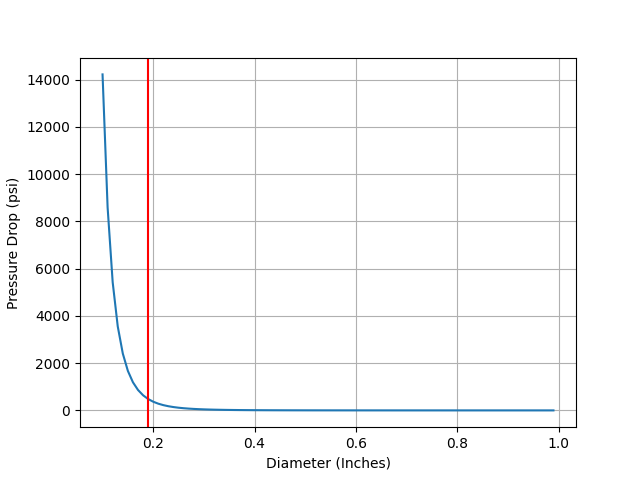

(69.205 <Unit('kilogram / meter ** 3')>,
 array([356.46363005, 294.59804136, 247.54418753, 210.92522488,
        181.869199  , 158.42828002, 139.24360549, 123.34381663,
        110.0196389 ,  98.74338782,  89.11590751,  80.83075511,
         73.64951034,  67.38442912,  61.88604688,  57.03418081,
         52.73130622,  48.89761729,  45.46729975,  42.38568728,
         39.60707001,  37.0929896 ,  34.81090137,  32.73311571,
         30.83595416,  29.09907184,  27.50490973,  26.03824909,
         24.68584696,  23.4361361 ,  22.27897688,  21.20545092,
         20.20768878,  19.27872526,  18.41237759,  17.60314222,
         16.84610728,  16.13687777,  15.47151172,  14.84646522,
         14.2585452 ,  13.70486851,  13.18282655,  12.69005447,
         12.22440432,  11.78392165,  11.36682494,  10.97148754,
         10.59642182,  10.24026516,   9.9017675 ,   9.57978044,
          9.2732474 ,   8.98119501,   8.70272534,   8.437009  ,
          8.18327893,   7.94082491,   7.70898854,   7.48715879,

In [24]:
variablesFunc()


In [25]:
#ALL DEBUGGING
#PROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELL
testPDrop = fl.units.dP_from_K(K = 1.0, rho = 1.0*(u.kilogram / u.meter **3), V = 1.0*(u.meter / u.second))
print(testPDrop)

a = [1, 2, 3]
b = 1 * (u.kilogram / u.meter **3)
c = [1, 2, 3] * (u.meter / u.second)
AHH = np.empty(1)

A = 1 * u.meter
B = 2 * u.meter

bruh = np.empty(1)

bruh = [A, B]
print(bruh)

AHHRange = np.empty(len(a))

for i in np.arange(0, len(a), 1):
    AHH = fl.units.dP_from_K(K = a[i], rho = b, V = c[i])
    AHHRange[i] = AHH.magnitude

print(AHHRange * AHH.units)

0.5 pascal
[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>]
[0.5 4.0 13.5] pascal
